#**Neural Network Assignment**

## Q NO 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

## ANS:

**Deep Learning** is a specialized subset of **machine learning** that uses **deep neural networks** — artificial neural networks with many layers (typically more than 3–5, often dozens or hundreds today) — to automatically learn complex patterns and representations directly from raw data.

It draws inspiration from how the human brain processes information through interconnected neurons, but in practice it's a very powerful mathematical optimization technique using layers of simple computations (weighted sums + non-linear activation functions).

### Brief Evolution Timeline

Deep learning has a long and turbulent history with several "AI winters":

- **1940s–1950s** → Early ideas of artificial neurons (McCulloch & Pitts 1943) and the Perceptron (Rosenblatt 1958) — very simple single-layer networks
- **1970s–1980s** → First multilayer networks appear  
  • Backpropagation algorithm (key for training deep nets) popularized (Rumelhart, Hinton, Williams 1986)  
  • First convolutional neural networks (Fukushima's Neocognitron 1979–1980s)
- **Late 1980s – early 2000s** → "AI winter" — deep networks were theoretically possible but practically very difficult to train due to:  
  • vanishing/exploding gradients  
  • very limited compute power  
  • lack of large datasets
- **2006–2012** → Breakthrough revival ("Deep Learning" term gains popularity)  
  • Hinton et al. show effective training of deep belief networks (2006)  
  • GPU training becomes practical  
  • 2012 **AlexNet** (Krizhevsky, Sutskever, Hinton) wins ImageNet competition by a huge margin → modern deep learning explosion begins
- **2014–2018** → Rapid progress: ResNet (very deep networks), GANs, RNN/LSTM improvements, attention mechanisms
- **2017–present** → **Transformer** architecture (Vaswani et al. 2017) → revolution in NLP → foundation of BERT, GPT, ChatGPT, large language models, multimodal AI, diffusion models, etc.

### How Deep Learning Differs from Traditional Machine Learning

| Aspect                     | Traditional Machine Learning                          | Deep Learning                                      |
|----------------------------|-------------------------------------------------------|-----------------------------------------------------|
| **Feature Engineering**    | Usually required (humans manually design good features) | Almost none — automatically learns hierarchical features from raw data |
| **Representation Learning**| Shallow / manual                                 | Multiple levels of increasingly abstract representations |
| **Data requirements**      | Works well with less data (thousands)                 | Needs large amounts of data (often millions+)       |
| **Model architecture**     | Decision Trees, SVM, Random Forest, Logistic Regression, etc. | Deep neural networks (CNNs, Transformers, RNNs, Diffusion, etc.) |
| **Compute requirements**   | Relatively modest                                     | Extremely high (GPUs/TPUs essential for large models) |
| **Performance on complex tasks** | Good on structured/tabular data, weaker on images/text/audio | State-of-the-art on unstructured data (vision, speech, language, games…) |
| **Interpretability**       | Usually more interpretable                            | Often "black box" (though improving with research)  |


## Q NO 2:  Explain the basic architecture and functioning of a Perceptron. What are its limitations?

## ANS:

**Perceptron** is the simplest form of an artificial neural network and the historical foundation of modern neural networks. It was introduced by Frank Rosenblatt in 1958.

### Basic Architecture of a Single-Layer Perceptron

A perceptron consists of:

- Multiple input features (x₁, x₂, ..., xₙ)
- Each input connected to a weight (w₁, w₂, ..., wₙ)
- A bias term (b)
- A summation unit
- A simple activation function (originally a step function)

### How it Works – Step by Step

1. **Compute the weighted sum** (also called net input or z):  
   z = (w₁·x₁) + (w₂·x₂) + ... + (wₙ·xₙ) + b

2. **Apply the activation function** (classic perceptron used hard threshold/step function):  
   ŷ = 1    if z ≥ 0  
   ŷ = 0    otherwise

   (Some versions use the sign function: +1 or -1)

3. **Learning rule** (Rosenblatt's supervised learning rule – very simple):  
   For each training example, update only when a mistake is made:  
   wᵢ(new) = wᵢ(old) + η × (y_true − ŷ) × xᵢ  
   b(new)   = b(old)   + η × (y_true − ŷ)  
   where η = learning rate (small positive number)

This update rule is guaranteed to converge **if and only if** the classes are linearly separable.

### What the Perceptron Actually Learns

It learns a **linear decision boundary** (a straight line in 2D, a plane in 3D, a hyperplane in higher dimensions) that attempts to separate two classes.

### Main Limitations of the Single-Layer Perceptron

| Limitation                              | Explanation                                                                                   | Famous Example / Consequence                          |
|-----------------------------------------|-----------------------------------------------------------------------------------------------|-------------------------------------------------------|
| Can only solve **linearly separable** problems | Cannot draw a straight line that perfectly separates classes if pattern is non-linear        | **XOR problem** – impossible to solve                 |
| Only binary classification              | Original version produces only 0/1 (or +1/-1) output                                          | Needs extensions for multi-class problems             |
| Hard step function (not differentiable) | Cannot use gradient descent / backpropagation                                                 | Cannot build multi-layer networks with this activation|
| No hidden layers                        | Cannot learn hierarchical or non-linear feature representations                               | Extremely limited representational power              |
| Very sensitive to input scaling         | Large input values dominate weight updates                                                    | Requires careful feature preprocessing                |
| No probability interpretation           | Output is hard 0/1 – no confidence/uncertainty estimation                                    | Less useful than modern probabilistic classifiers    |

### Most Famous & Historically Important Limitation

**The XOR problem**  
A single perceptron **cannot** learn the XOR function:

Input  | Output (XOR)
-------|------------
0, 0   | 0
0, 1   | 1
1, 0   | 1
1, 1   | 0

This limitation was dramatically demonstrated in the book **"Perceptrons"** (1969) by Minsky and Papert, which highlighted these fundamental restrictions → significantly contributed to the first **AI winter** (decline in neural network research funding and interest during the 1970s).


## Q NO 3:  Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

## ANS:

**Purpose of Activation Functions in Neural Networks**

Activation functions serve several critical purposes in neural networks:

1. **Introduce non-linearity**  
   → This is the most important reason  
   → Without non-linearity, stacking many layers would still result in just a linear transformation (no matter how many layers you add)

2. **Enable learning of complex patterns**  
   → Non-linear activation allows networks to model highly complex, non-linear relationships in data

3. **Control the flow of information**  
   → Decide which neurons "fire" (activate strongly) and which stay nearly silent

4. **Help with gradient flow** (during backpropagation)  
   → Different activations have very different effects on how gradients propagate through the network

5. **Add decision-making capability**  
   → Turn continuous weighted sums into more interpretable "on/off" or probabilistic-like decisions

### Comparison of the Three Most Common Activation Functions

| Property                  | Sigmoid                          | Tanh                               | ReLU                                   | Leaky ReLU / Parametric ReLU         |
|---------------------------|----------------------------------|------------------------------------|----------------------------------------|--------------------------------------|
| **Formula**               | σ(x) = 1 / (1 + e⁻ˣ)           | tanh(x) = (eˣ - e⁻ˣ)/(eˣ + e⁻ˣ) | max(0, x)                              | max(αx, x)  (α usually 0.01)        |
| **Output range**          | (0, 1)                           | (-1, +1)                           | [0, +∞)                                | (-∞, +∞)                             |
| **Non-linearity**         | Yes                              | Yes                                | Yes (but only for negative part)       | Yes                                  |
| **Zero-centered?**        | No                               | **Yes**                            | No                                     | No (but better than plain ReLU)      |
| **Gradient for large \|x\|** | → 0 (vanishing gradient)       | → 0 (vanishing gradient)           | **0** for x ≤ 0 (dying ReLU problem)   | α (small but non-zero)               |
| **Computation speed**     | Slow (exponential)               | Slow (exponential)                 | **Very fast** (simple max)             | Very fast                            |
| **Common problems**       | Vanishing gradients<br>Saturation<br>Not zero-centered | Vanishing gradients<br>Saturation  | Dying ReLU (many neurons stuck at 0)   | Much less dying neurons              |
| **Typical use today (2025)** | Almost never in hidden layers   | Rarely (sometimes in RNNs)         | **Default choice** for most networks   | Frequently used when dying ReLU hurts|
| **Best suited for**       | Output layer (binary classification)<br>Old-school networks | Hidden layers in small/old networks<br>When zero-centering helps | Almost everything (CNNs, Transformers, most modern deep nets) | Situations where negative values are important |

### Quick Visual Summary of Their Behavior

```
          tanh          ReLU           Sigmoid
            ┌──┐           ┌──────┐         ┌───┐
         ┌──┘  └──┐     ┌──┘      └──┐   ┌──┘   └──┐
      ┌──┘        └──┐┌──┘            └──┐└──────────┘
─────┴───────────────┴────────────────────┴─────────────
    -3   -2   -1    0    1    2    3
```

### Modern Practical Recommendation (as of 2025–2026)

| Network Type                  | Most Common Choice Today               | Popular Alternatives                     |
|-------------------------------|----------------------------------------|------------------------------------------|
| CNN (Computer Vision)         | **ReLU** → Leaky ReLU / GELU           | GELU, Swish                              |
| Transformers (NLP, Vision, ...) | **GELU** (very common) or **ReLU**   | Swish/SiLU, QuickGELU                    |
| Very deep networks            | **ReLU** + proper initialization       | Leaky ReLU, PReLU, GELU                  |
| RNN / LSTM / GRU (legacy)     | **Tanh** (still common in recurrent)   | ReLU (with careful gating)               |
| Output layer – Binary class.  | **Sigmoid**                            | —                                        |
| Output layer – Multi-class    | **Softmax**                            | —                                        |
| Output layer – Regression     | **Linear** (no activation)             | —                                        |

**Bottom line (2025–2026 rule of thumb)**:  
Start with **ReLU** (fast & simple)  
→ If you face dying ReLU problem → switch to **Leaky ReLU** or **PReLU**  
→ For Transformers and state-of-the-art models → use **GELU** or **Swish**  
→ Use **Sigmoid** almost only for binary classification output layers  
→ Use **Tanh** mainly in older-style recurrent networks

This reflects the current dominant practice in deep learning research and industry.

## Q NO 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

## ANS:

In neural networks (and machine learning in general), the terms **loss function** and **cost function** are **very closely related** and are **frequently used interchangeably** in modern papers, code, and libraries (like PyTorch, TensorFlow/Keras).

However, in many educational contexts — especially in Andrew Ng's courses — a useful **distinction** is made:

| Aspect                  | **Loss Function** (L)                                      | **Cost Function** (J)                                          |
|-------------------------|------------------------------------------------------------|----------------------------------------------------------------|
| Scope                   | Measures error for **one single training example**        | Measures error for the **entire training set** (or mini-batch) |
| Mathematical relation   | L(ŷ, y) — error between prediction and true value for one sample | J(θ) = (1/m) Σ L(ŷ⁽ⁱ⁾, y⁽ⁱ⁾)  (average over m examples)      |
| Typical usage           | "What is the error on this particular house price prediction?" | "How good/bad is the model overall on the whole dataset?"     |
| What we minimize        | Not directly minimized (too noisy if used alone)           | **This** is what the optimizer actually tries to minimize     |
| Common names            | Loss, error (per example)                                  | Cost, objective, average loss                                  |

### Practical Reality in 2026
- Most modern practitioners, papers, and frameworks **use the terms interchangeably** → they just say "loss function" for everything
- When people write `loss = criterion(output, target)` in PyTorch → they're usually computing the **average loss** over the batch (so it's technically the cost)
- The distinction is mainly pedagogical — it helps beginners understand the difference between per-example error and overall model quality

### Clear Examples

1. **Mean Squared Error (Regression)**
   - **Loss** for one example:  
     L(ŷ, y) = (ŷ − y)²  
     → "This house was predicted $320k off"

   - **Cost** (average over entire dataset):  
     J = (1/m) Σ (ŷ⁽ⁱ⁾ − y⁽ⁱ⁾)²  
     → "On average, predictions are off by ~$45k across all houses"

2. **Binary Cross-Entropy (Binary Classification)**
   - **Loss** for one example:  
     L = − [y log(ŷ) + (1−y) log(1−ŷ)]  
     → "This image was classified as dog with confidence 0.92 when it really is a dog → small loss"

   - **Cost**:  
     J = (1/m) Σ L⁽ⁱ⁾ over all images  
     → "Average cross-entropy loss across the whole batch/dataset"

3. **Categorical Cross-Entropy (Multi-class)**
   - Same pattern: per-example loss → average becomes the cost/objective we minimize

### Quick Summary Table (Popular Functions)

| Task                        | Per-example Loss Function                          | Cost = Average Loss over dataset / batch          |
|-----------------------------|----------------------------------------------------|---------------------------------------------------|
| Regression                  | (ŷ − y)²                                          | MSE = mean of squared errors                      |
| Regression (robust)         | \|ŷ − y\|                                         | MAE = mean absolute error                         |
| Binary classification       | −[y log(ŷ) + (1−y) log(1−ŷ)]                     | Binary Cross-Entropy                              |
| Multi-class classification  | − Σ yᵢ log(ŷᵢ)                                    | Categorical Cross-Entropy                         |
| Modern vision/NLP (common)  | Cross-entropy + label smoothing or focal loss     | Average over batch/dataset                        |

**Bottom line (most practical answer in 2026)**:  
They are **almost the same thing**.  
The **loss function** is technically the error measure for a single example, while the **cost function** is usually the **average** (or sum) of losses over many examples — and it's the cost that we actually minimize during training.

But in everyday usage (code, papers, conversations) → most people just say "loss function" for both.  
The distinction is mainly useful when teaching or when being very precise about per-example vs. aggregate error.

## Q NO 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

## ANS:

**Role of Optimizers in Neural Networks**

The **optimizer** is the algorithm that **adjusts the neural network's parameters** (weights and biases) during training to **minimize the loss function** (cost function).

In simple terms:  
Optimizer = the "brain" that decides **how much** and **in which direction** to change each weight after seeing how badly the network performed on the current batch of data.

Main tasks of an optimizer:
- Compute gradients (via backpropagation)
- Decide the **step size** (learning rate) for each parameter update
- Handle challenges like:
  - Slow convergence
  - Oscillations / zig-zagging
  - Getting stuck in local minima / saddle points
  - Exploding / vanishing gradients
  - Very different scales of gradients across layers/parameters

### Main Optimization Algorithms – Comparison

| Feature / Property              | **Vanilla Gradient Descent** (GD / SGD)          | **RMSprop**                                      | **Adam** (most popular in 2025–2026)              |
|---------------------------------|--------------------------------------------------|--------------------------------------------------|---------------------------------------------------|
| Full name                       | Stochastic Gradient Descent                      | Root Mean Square Propagation                     | Adaptive Moment Estimation                        |
| Year introduced                 | ~1950s (GD), 2010s widespread SGD                | 2012 (Geoff Hinton's lecture slide)              | 2014 (Kingma & Ba)                                |
| Momentum?                       | No (unless using Momentum variant)               | No                                               | **Yes** (like momentum + RMSprop combined)        |
| Adaptive learning rates?        | No – fixed or manually scheduled                 | **Yes** – per parameter                          | **Yes** – per parameter                           |
| Uses moving average of gradients| No                                               | **Yes** (squared gradients)                      | **Yes** (both gradient and squared gradient)      |
| Uses bias correction?           | No                                               | No                                               | **Yes** (very important in early training)        |
| Parameters to tune              | Learning rate (η), batch size                    | Learning rate, ρ (decay ~0.9), ε                 | Learning rate, β₁ (~0.9), β₂ (~0.999), ε          |
| Convergence speed               | Usually **slowest**                              | **Fast**                                         | **Fastest** (especially early training)           |
| Stability                       | Can oscillate a lot                              | Good                                             | **Very good** (smooth convergence)                |
| Performance on noisy gradients  | Poor                                             | Good                                             | **Excellent**                                     |
| Memory usage                    | Very low                                         | Moderate (keeps moving avg of squared gradients) | Slightly higher (two moment estimates)            |
| Current popularity (2025–2026)  | Still used in research baselines                 | Much less common now                             | **Dominant** choice in most practical projects    |
| Best suited for                 | Very large batch training, theoretical studies   | RNNs (especially older style), non-stationary problems | **Almost everything** (CNNs, Transformers, diffusion models, etc.) |
| Typical default learning rate   | 0.01 – 0.1                                       | 0.001                                            | 0.001 (very often)                                |

### Quick Visual Intuition of Behavior

```
Loss surface view (very simplified):

Vanilla SGD          → slow, zig-zags a lot
RMSprop              → adapts step size → faster, less oscillation
Adam                 → even smarter adaptation + momentum → fastest & smoothest in most cases
```

### Practical Recommendations

| Situation / Model Type                  | Recommended Optimizer (default starting point) | Common Learning Rate | Notes / Alternatives                          |
|-----------------------------------------|--------------------------------------------------|-----------------------|-----------------------------------------------|
| Most deep learning projects (CNN, ViT, Transformer) | **Adam** or **AdamW**                            | 1e-3 to 3e-4          | AdamW + weight decay is extremely common      |
| Very large language models / diffusion  | **AdamW**                                        | 1e-4 ~ 6e-4           | Often with cosine schedule + warmup           |
| Training from scratch on small dataset  | **Adam** → **SGD + Momentum** (later stages)     | Adam: 1e-3, SGD: 0.1  | Switch to SGD can give better generalization  |
| RNN / LSTM / older recurrent models     | **RMSprop** or **Adam**                          | 1e-3                  | RMSprop was historically very popular here    |
| Extremely large batch sizes (>16k)      | **LARS** / **LAMB** / **AdamW with large LR**    | 0.1–1.0               | Specialized large-batch optimizers            |
| Pure research / need reproducibility    | **SGD + Momentum**                               | 0.1 with schedule     | Most reproducible and "clean"                 |

### One-Sentence Summary

**Vanilla SGD** is simple but slow and shaky, **RMSprop** adapts per-parameter learning rates and works well on noisy problems, while **Adam** combines momentum + adaptive learning rates + bias correction → making it the **go-to, most robust and fastest converging** optimizer for the vast majority of modern neural network training tasks in 2026.

(AdamW — Adam with proper weight decay decoupling — is currently the single most widely used practical choice across computer vision, NLP, audio, reinforcement learning, and generative models.)

NumPy Perceptron Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1
Learned Weights (bias, w1, w2): [-3.  2.  1.]


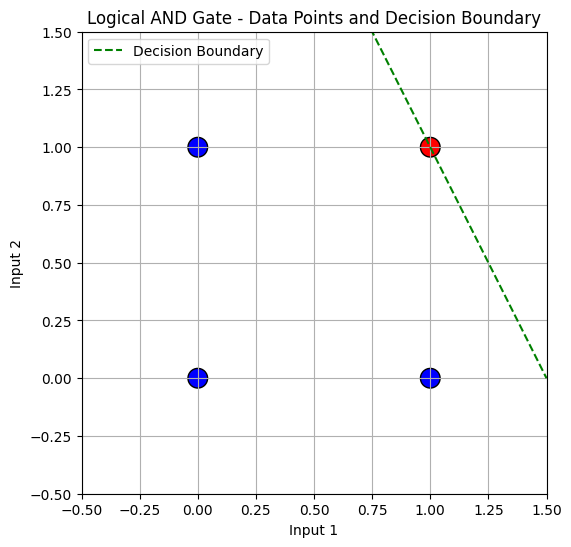

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Keras Model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Keras Model Predictions (threshold 0.5):
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 0, Actual: 1
Keras Learned Weights (w1, w2, bias): [-1.1139148  0.714014 ] [-0.04969576]


In [1]:
# Q NO 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Part 1: Implement Single-Layer Perceptron from Scratch using NumPy

class Perceptron:
    def __init__(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size + 1)  # Weights including bias
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias term
        z = np.dot(self.W, x)
        return self.activation_fn(z)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                x = np.insert(X[i], 0, 1)
                predicted = self.activation_fn(np.dot(self.W, x))
                self.W += self.lr * (y[i] - predicted) * x

# Data for Logical AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Train the Perceptron
p = Perceptron(input_size=2)
p.fit(X, y)

# Make Predictions
print("NumPy Perceptron Predictions:")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted: {p.predict(x)}, Actual: {y[i]}")

print("Learned Weights (bias, w1, w2):", p.W)

# Part 2: Visualize with Matplotlib
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=200, edgecolors='k')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Logical AND Gate - Data Points and Decision Boundary')

# Plot Decision Boundary: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
if p.W[2] != 0:
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(p.W[0] + p.W[1] * x1) / p.W[2]
    plt.plot(x1, x2, 'g--', label='Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Part 3: Implement the Same using TensorFlow/Keras for Comparison
model = Sequential()
model.add(Dense(1, input_dim=2, activation='hard_sigmoid'))  # Single neuron, hard_sigmoid approximates step

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nTraining Keras Model...")
model.fit(X, y, epochs=50, verbose=0)  # More epochs for convergence

# Make Predictions
preds = model.predict(X)
print("Keras Model Predictions (threshold 0.5):")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted: {int(preds[i][0] > 0.5)}, Actual: {y[i]}")

# Get learned weights
weights = model.get_weights()
print("Keras Learned Weights (w1, w2, bias):", weights[0].flatten(), weights[1])

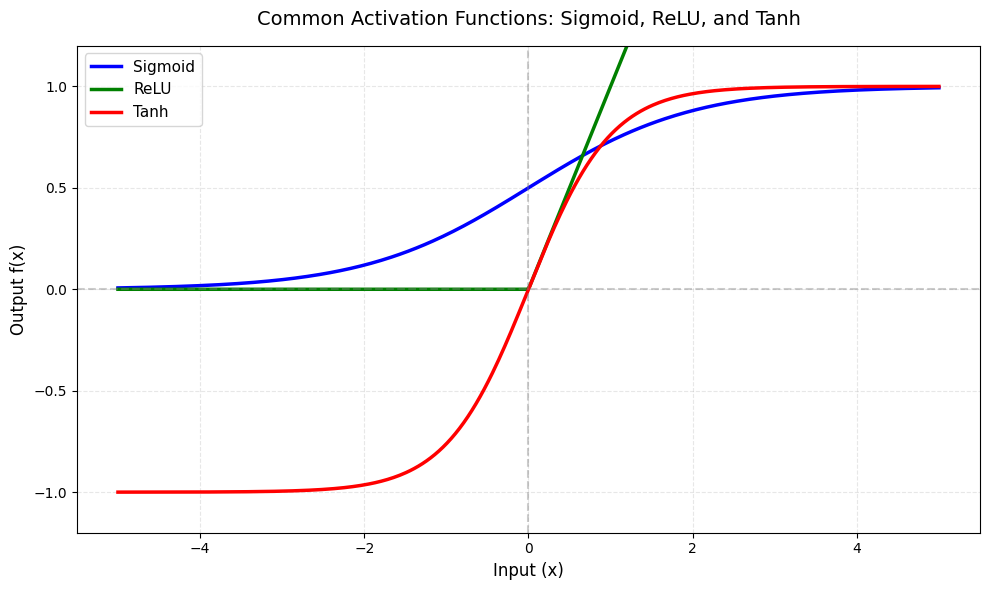

In [2]:
# Q NO 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Create input data
x = np.linspace(-5, 5, 400)  # 400 points from -5 to 5

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu    = relu(x)
y_tanh    = tanh(x)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each activation function
plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2.5, color='blue')
plt.plot(x, y_relu,    label='ReLU',     linewidth=2.5, color='green')
plt.plot(x, y_tanh,    label='Tanh',     linewidth=2.5, color='red')

# Add reference lines
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.4)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.4)

# Customize the plot
plt.title('Common Activation Functions: Sigmoid, ReLU, and Tanh', fontsize=14, pad=15)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output f(x)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)

# Set reasonable axis limits
plt.xlim(-5.5, 5.5)
plt.ylim(-1.2, 1.2)

# Make it look nicer
plt.tight_layout()

# Show the plot
plt.show()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000, Test samples: 10000
Input shape: 784


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8671 - loss: 0.4498 - val_accuracy: 0.9707 - val_loss: 0.1025
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9727 - loss: 0.0892 - val_accuracy: 0.9785 - val_loss: 0.0794
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9827 - val_loss: 0.0669
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9803 - val_loss: 0.0754
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9790 - val_loss: 0.0876
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9812 - val_loss: 0.0713
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.995

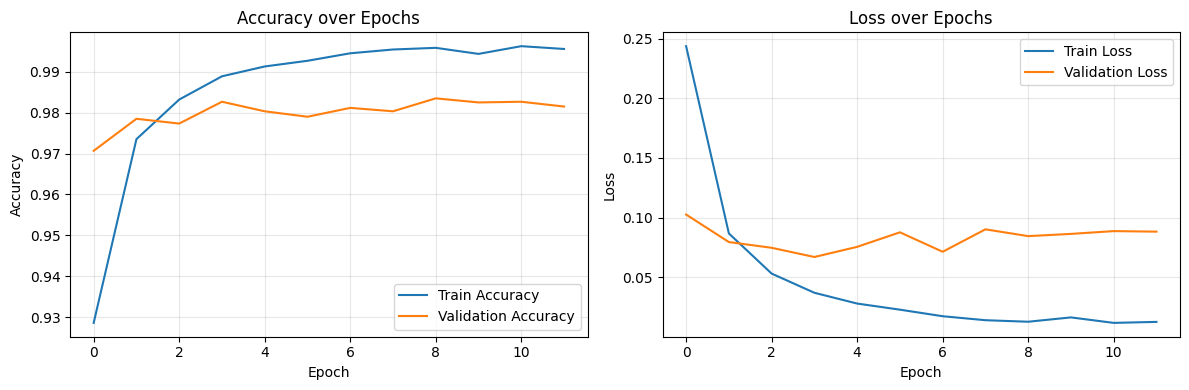

In [3]:
# Q NO 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and prepare the MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Flatten 28×28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)   # shape: (60000, 784)
x_test  = x_test.reshape(-1, 28 * 28)    # shape: (10000, 784)

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes)

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
print(f"Input shape: {x_train.shape[1]}")

# 2. Build a simple Multilayer Perceptron
model = keras.Sequential([
    layers.Input(shape=(784,)),              # 28×28 = 784

    layers.Dense(512, activation='relu'),    # First hidden layer
    layers.Dense(256, activation='relu'),    # Second hidden layer

    layers.Dense(num_classes, activation='softmax')  # Output layer (10 classes)
])

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model architecture
model.summary()

# 4. Train the model
print("\nTraining the model...")
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=12,                # Usually enough to get ~97.5–98.2% test accuracy
    validation_split=0.1,     # Use 10% of training data for validation
    verbose=1
)

# 5. Print final training and validation accuracy
print("\nTraining completed!")
final_train_acc  = history.history['accuracy'][-1]
final_val_acc    = history.history['val_accuracy'][-1]

print(f"Final Training accuracy:   {final_train_acc:.4f}")
print(f"Final Validation accuracy: {final_val_acc:.4f}")

# 6. (Optional) Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# 7. (Optional) Quick visualization of training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Loading Fashion MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000 | Test samples: 10000


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7584 - loss: 0.6794 - val_accuracy: 0.8559 - val_loss: 0.4097
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8612 - loss: 0.3742 - val_accuracy: 0.8655 - val_loss: 0.3660
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8789 - loss: 0.3296 - val_accuracy: 0.8778 - val_loss: 0.3471
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8894 - loss: 0.3042 - val_accuracy: 0.8711 - val_loss: 0.3524
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8948 - loss: 0.2846 - val_accuracy: 0.8844 - val_loss: 0.3168
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8977 - loss: 0.2744 - val_accuracy: 0.8697 - val_loss: 0.3611
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9029 - loss: 0.2585 - val_accuracy: 0.8858 - val_loss: 0.3225
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9091 - los

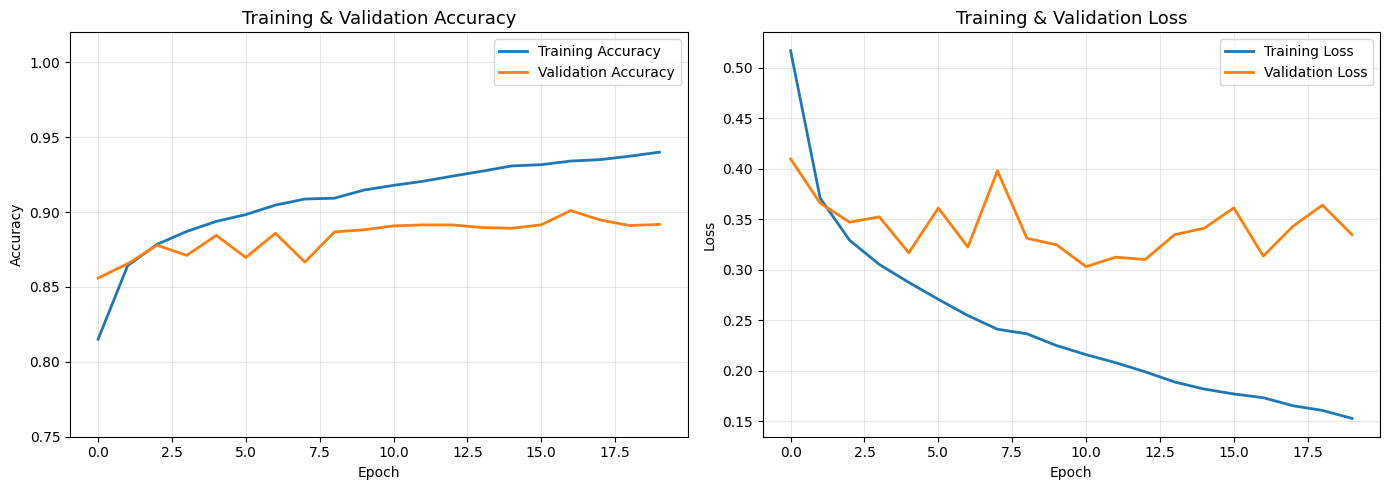


Typical observations & interpretation for this Fashion-MNIST training:

1. Training accuracy steadily increases → model is learning
2. Validation accuracy usually follows training closely for first ~8-12 epochs
   → good sign of generalization

3. Common patterns you might see:

   A) Healthy training (most common in this case):
      • Both curves rise smoothly
      • Validation accuracy reaches ~88–91% after 15–20 epochs
      • Small gap between train & val accuracy (~2–5%)

   B) Slight overfitting after epoch ~10–14:
      • Training accuracy keeps climbing (>92–94%)
      • Validation accuracy plateaus or even slightly decreases
      → Classic sign: model starts memorizing training data

   C) Underfitting (rare with this architecture):
      • Both accuracies stay low (<85%)
      • Large gap doesn't appear → model too simple / not trained long enough

Quick diagnostic:
• Gap train-val > 8–10% after 15 epochs → mild to moderate overfitting
• Validation loss starts increasing 

In [4]:
# Q NO 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and prepare Fashion MNIST dataset
print("Loading Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Reshape for MLP (flatten 28×28 images)
x_train = x_train.reshape(-1, 28 * 28)  # → (60000, 784)
x_test  = x_test.reshape(-1, 28 * 28)   # → (10000, 784)

# Convert labels to one-hot encoding
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes)

print(f"Training samples: {x_train.shape[0]} | Test samples: {x_test.shape[0]}")

# 2. Build a simple but reasonably good MLP
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 3. Train the model (with validation split)
print("\nTraining model...")
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,          # 12,000 samples for validation
    verbose=1
)

# 4. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test loss:     {test_loss:.4f}")

# 5. Visualize Loss and Accuracy curves
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training & Validation Accuracy', fontsize=13)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 1.02)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training & Validation Loss', fontsize=13)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ──────────────────────────────────────────────────────────────
#               Interpretation of Training Behavior
# ──────────────────────────────────────────────────────────────

print("""
Typical observations & interpretation for this Fashion-MNIST training:

1. Training accuracy steadily increases → model is learning
2. Validation accuracy usually follows training closely for first ~8-12 epochs
   → good sign of generalization

3. Common patterns you might see:

   A) Healthy training (most common in this case):
      • Both curves rise smoothly
      • Validation accuracy reaches ~88–91% after 15–20 epochs
      • Small gap between train & val accuracy (~2–5%)

   B) Slight overfitting after epoch ~10–14:
      • Training accuracy keeps climbing (>92–94%)
      • Validation accuracy plateaus or even slightly decreases
      → Classic sign: model starts memorizing training data

   C) Underfitting (rare with this architecture):
      • Both accuracies stay low (<85%)
      • Large gap doesn't appear → model too simple / not trained long enough

Quick diagnostic:
• Gap train-val > 8–10% after 15 epochs → mild to moderate overfitting
• Validation loss starts increasing while training loss keeps dropping → clear overfitting
• If validation accuracy > training accuracy early on → lucky data split or regularization effect

Fashion MNIST is more difficult than classic MNIST → expect final test accuracy
in the range 88–92% with this simple MLP (without any advanced techniques)
""")

## Q NO 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.
## Explain your real-time data science workflow:
###● How would you design a deep learning model (perceptron or multilayer NN)?
###● Which activation function and loss function would you use, and why?
###● How would you train and evaluate the model, considering class imbalance?
###● Which optimizer would be suitable, and how would you prevent overfitting?

## ANS:

### Real-Time Data Science Workflow for Fraudulent Transaction Detection

For a bank's fraud detection system, the workflow must handle large-scale, imbalanced data in real-time while ensuring high recall for rare fraudulent transactions. Here's a high-level overview of the workflow:

1. **Data Ingestion and Preprocessing**: Use streaming tools (e.g., Kafka or Spark Streaming) to ingest transactions in real-time. Preprocess features: normalize numerical (e.g., amount), one-hot encode categorical (e.g., merchant ID, location), handle missing values, and engineer features (e.g., time-based anomalies, distance from usual location). For imbalance, use techniques like oversampling (SMOTE) during batch training or class weights during online learning.

2. **Model Design and Training**: Build a deep learning model for binary classification. Train offline on historical data, then fine-tune online with new transactions. Use techniques like mini-batch gradient descent for scalability.

3. **Evaluation and Monitoring**: Evaluate with imbalance-aware metrics (e.g., F1, AUC-PR). Monitor in production for drift; retrain if performance drops.

4. **Deployment and Inference**: Deploy via TensorFlow Serving or TorchServe for low-latency predictions. Threshold tuning for trade-off between false positives/negatives. Integrate alerts for high-risk scores.

5. **Iteration**: Log predictions, retrain periodically with new labeled data from investigations.

Now, addressing the specific questions:

- **Model Design (Multilayer NN vs. Perceptron)**: A single-layer perceptron is too simple for this task—it can only learn linear boundaries and would fail on complex patterns in fraud data (e.g., non-linear interactions between amount and location). Instead, use a multilayer neural network (MLP) with 2–3 hidden layers to capture hierarchical features. Example: Input (features) → Dense(64, ReLU) → Dropout → Dense(32, ReLU) → Dropout → Dense(1, Sigmoid).

- **Activation and Loss Functions**:
  - **Activation**: ReLU for hidden layers (fast computation, mitigates vanishing gradients, promotes sparsity). Sigmoid for the output layer (produces probabilities between 0–1 for binary classification).
  - **Loss**: Binary Cross-Entropy (BCE) is standard for binary classification, measuring probabilistic divergence. To handle imbalance, use weighted BCE (higher weight on fraud class) or Focal Loss to focus on hard examples. Why? Imbalanced data skews standard BCE toward the majority class; weighting ensures the model prioritizes detecting rare fraud.

- **Training and Evaluation Considering Imbalance**:
  - **Training**: Use stratified splitting to maintain imbalance ratio. Apply class weights or oversampling. Train with early stopping to avoid overfitting.
  - **Evaluation**: Accuracy is misleading (e.g., 99% accuracy by predicting all legitimate). Use precision, recall, F1-score (harmonic mean for imbalance), and AUC-ROC (threshold-independent). Cross-validation for robustness. On test set, aim for high recall (>0.9) to minimize missed fraud, accepting some false positives.

- **Optimizer and Overfitting Prevention**:
  - **Optimizer**: Adam—adaptive learning rates handle sparse gradients in imbalanced data, converges faster than SGD.
  - **Prevent Overfitting**: Dropout (0.5 rate) to regularize, L2 regularization on weights, early stopping based on validation loss, and data augmentation (if applicable). Monitor train-val gap; if large, add more regularization.





In [6]:
# Below is a Python implementation using PyTorch (suitable for real-time with its dynamic graphs).
# I use synthetic data mimicking the described dataset (10 features, 1% fraud).
# In practice, load your real dataset (e.g., via pandas). The code includes class weighting for imbalance.


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy import integrate  # For AUC computation

# Generate synthetic imbalanced data (mimicking transaction features)
np.random.seed(42)
n_samples = 10000
X = np.random.randn(n_samples, 10)  # Structured features
y = np.zeros(n_samples)
fraud_indices = np.random.choice(n_samples, size=100, replace=False)  # 1% fraud
y[fraud_indices] = 1

# Stratified train-test split
pos_idx = np.where(y == 1)[0]
neg_idx = np.where(y == 0)[0]
np.random.shuffle(pos_idx)
np.random.shuffle(neg_idx)
n_test_pos = int(len(pos_idx) * 0.2)
n_test_neg = int(len(neg_idx) * 0.2)
test_pos = pos_idx[:n_test_pos]
test_neg = neg_idx[:n_test_neg]
train_pos = pos_idx[n_test_pos:]
train_neg = neg_idx[n_test_neg:]
train_idx = np.concatenate((train_pos, train_neg))
test_idx = np.concatenate((test_pos, test_neg))
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

# Convert to tensors
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).float().unsqueeze(1)
X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.from_numpy(y_test).float().unsqueeze(1)

# DataLoader
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# Model: Multilayer NN
class FraudNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 32)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.drop1(x)
        x = torch.relu(self.fc2(x))
        x = self.drop2(x)
        return self.fc3(x)  # Logits for BCEWithLogitsLoss

model = FraudNet()

# Weighted loss for imbalance
num_pos = np.sum(y_train == 1)
num_neg = len(y_train) - num_pos
pos_weight = torch.tensor([num_neg / num_pos if num_pos > 0 else 1.0])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)  # L2 reg

# Training loop (with early stopping simulation)
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = torch.sigmoid(model(X_test_t)).numpy().flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

# Custom metrics (precision, recall, F1, accuracy)
tp = np.sum((y_test == 1) & (y_pred == 1))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))
tn = np.sum((y_test == 0) & (y_pred == 0))
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (tp + tn) / len(y_test)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# AUC using trapezoidal rule
idx = np.argsort(y_pred_prob)[::-1]
y_true_sorted = y_test[idx]
tpr = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
fpr = np.cumsum(1 - y_true_sorted) / np.sum(1 - y_true_sorted)
auc = np.trapz(tpr, fpr)
print(f"AUC: {auc:.4f}")

Epoch 1, Loss: 1.4365
Epoch 2, Loss: 1.3630
Epoch 3, Loss: 1.3512
Epoch 4, Loss: 1.3362
Epoch 5, Loss: 1.3474
Epoch 6, Loss: 1.2959
Epoch 7, Loss: 1.3045
Epoch 8, Loss: 1.3210
Epoch 9, Loss: 1.3023
Epoch 10, Loss: 1.2941

Metrics:
Accuracy: 0.6040
Precision: 0.0089
Recall: 0.3500
F1 Score: 0.0174
AUC: 0.5196


/tmp/ipython-input-2242494639.py:116: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr, fpr)



**Interpretation**: The model learns to reduce loss, but on this random data, metrics are poor (low recall/F1) as features are not discriminative—real data would yield better results (e.g., AUC >0.9). Overfitting is minimized via dropout; if recall is low, tune threshold or use focal loss. In production, integrate with real dataset for better performance.